# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [243]:
from Cabinet_Test import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')

In [244]:
from AMDC import AMDC

In [245]:
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)

In [246]:
Vdc = 20
cmd = cmd(Vdc, amdc, debug = False)   

	> cabinet setup 20.00000
['cabinet setup 20.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cb', 'SUCCESS']


In [210]:
cmd.enable_pwm()


	> hw pwm on
['hw pwm on', 'SUCCESS']


In [119]:
cmd.phase_volts_3p(0,-10,0,5)

	> cabinet phv3 5 0.00000 -10.00000 0.00000
['cabinet phv3 5 0.00000 -10.00000 0.00000', 'SUCCESS']


In [247]:
cmd.disable_pwm()
cmd.twin_disable_ctrl()


	> hw pwm off
['hw pwm off', 'FAILURE']
	> twin disable_ctrl
['twin disable_ctrl', 'SUCCESS']


In [257]:
cmd.init_twin_ctrl()
cmd.twin_set_vdc(20)
cmd.twin_enable_ctrl()

	> twin init
['twin init', 'SUCCESS']
	> twin set_vdc 20.000000
['twin set_vdc 20.000000', 'SUCCESS']
	> twin enable_ctrl
['twin enable_ctrl', 'SUCCESS']


In [249]:
cmd.enable_pwm()

	> hw pwm on
['hw pwm on', 'SUCCESS']


In [250]:
cmd.twin_set_trq(0,0)
cmd.twin_set_s1(0,0)
cmd.twin_set_s2(0,0)
cmd.twin_set_freq(0)
cmd.enable_pwm()

	> twin set_trq 0.000000 0.000000
['twin set_trq 0.000000 0.000000', 'SUCCESS']
	> twin set_s1 0.000000 0.000000
['twin set_s1 0.000000 0.000000', 'SUCCESS']
	> twin set_s1 0.000000 0.000000
['twin set_s1 0.000000 0.000000', 'SUCCESS']
	> twin set_freq 0.000000
['twin set_freq 0.000000', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'FAILURE']


In [129]:
cmd.twin_disable_ctrl()
cmd.disable_pwm()

	> twin disable_ctrl
['twin disable_ctrl', 'SUCCESS']
	> hw pwm off
['hw pwm off', 'SUCCESS']


In [269]:
cmd.twin_set_freq(10)
cmd.twin_set_trq(0,1)
cmd.twin_set_s1(0,0)
cmd.twin_set_s2(0,0)

	> twin set_freq 10.000000
['twin set_freq 10.000000', 'SUCCESS']
	> twin set_trq 0.000000 1.000000
['twin set_trq 0.000000 1.000000', 'SUCCESS']
	> twin set_s1 0.000000 0.000000
['twin set_s1 0.000000 0.000000', 'SUCCESS']
	> twin set_s2 0.000000 0.000000
['twin set_s2 0.000000 0.000000', 'SUCCESS']


## Logging


In [223]:
import matplotlib

In [253]:
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile

In [242]:
amdc.disconnect()

In [254]:
cmd.twin_enable_log()

mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()

	> twin enable_log
['twin enable_log', 'SUCCESS']
	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:



In [226]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c Iabc2_a Iabc2_b Iabc2_c Iabc3_a Iabc3_b Iabc3_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

	> log reg 0 LOG_Iabc1_a 1213208 1000 double
['log reg 0 LOG_Iabc1_a 1213208 1000 double', 'SUCCESS']
	> log reg 1 LOG_Iabc1_b 1213216 1000 double
['log reg 1 LOG_Iabc1_b 1213216 1000 double', 'SUCCESS']
	> log reg 2 LOG_Iabc1_c 1213224 1000 double
['log reg 2 LOG_Iabc1_c 1213224 1000 double', 'SUCCESS']
	> log reg 3 LOG_Iabc2_a 1213232 1000 double
['log reg 3 LOG_Iabc2_a 1213232 1000 double', 'SUCCESS']
	> log reg 4 LOG_Iabc2_b 1213240 1000 double
['log reg 4 LOG_Iabc2_b 1213240 1000 double', 'SUCCESS']
	> log reg 5 LOG_Iabc2_c 1213248 1000 double
['log reg 5 LOG_Iabc2_c 1213248 1000 double', 'SUCCESS']
	> log reg 6 LOG_Iabc3_a 1213256 1000 double
['log reg 6 LOG_Iabc3_a 1213256 1000 double', 'SUCCESS']
	> log reg 7 LOG_Iabc3_b 1213264 1000 double
['log reg 7 LOG_Iabc3_b 1213264 1000 double', 'SUCCESS']
	> log reg 8 LOG_Iabc3_c 1213272 1000 double
['log reg 8 LOG_Iabc3_c 1213272 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable

In [227]:
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']


In [228]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'test_data.csv')
data

	> log dump bin 0
Dumping: LOG_Iabc1_a
Dump took: 0.922  sec
Dump rate: 1475.961  sps
Num samples: 1361 

	> log dump bin 1
Dumping: LOG_Iabc1_b
Dump took: 0.917  sec
Dump rate: 1484.057  sps
Num samples: 1361 

	> log dump bin 2
Dumping: LOG_Iabc1_c
Dump took: 1.029  sec
Dump rate: 1322.620  sps
Num samples: 1361 

	> log dump bin 3
Dumping: LOG_Iabc2_a
Dump took: 0.947  sec
Dump rate: 1437.609  sps
Num samples: 1361 

	> log dump bin 4
Dumping: LOG_Iabc2_b
Dump took: 1.023  sec
Dump rate: 1330.973  sps
Num samples: 1361 

	> log dump bin 5
Dumping: LOG_Iabc2_c
Dump took: 0.937  sec
Dump rate: 1452.940  sps
Num samples: 1361 

	> log dump bin 6
Dumping: LOG_Iabc3_a
Dump took: 0.934  sec
Dump rate: 1456.761  sps
Num samples: 1361 

	> log dump bin 7
Dumping: LOG_Iabc3_b
Dump took: 1.036  sec
Dump rate: 1314.336  sps
Num samples: 1361 

	> log dump bin 8
Dumping: LOG_Iabc3_c
Dump took: 1.017  sec
Dump rate: 1338.760  sps
Num samples: 1361 



,Iabc1_a,Iabc1_b,Iabc1_c,Iabc2_a,Iabc2_b,Iabc2_c,Iabc3_a,Iabc3_b,Iabc3_c
t,,,,,,,,,
0.000,0.015833,0.028014,0.014486,0.015790,0.012894,0.008823,-0.010039,-0.008596,-0.006776
0.001,0.015833,0.020632,0.029397,0.015125,0.010232,0.013481,-0.006046,-0.003938,-0.000787
0.002,0.075190,0.116592,0.051763,0.017121,0.017552,0.018139,-0.004050,-0.006600,-0.002118
0.003,0.060351,0.064922,0.029397,0.013794,0.013559,0.010154,-0.006711,-0.005935,-0.004114
0.004,0.045511,0.028014,0.044307,0.019117,0.014225,0.020136,-0.008708,-0.004604,0.000544
0.005,0.023252,0.013251,0.036852,0.015790,0.015556,0.021467,-0.007377,-0.006600,-0.002118
0.006,0.038092,0.035395,0.029397,0.016456,0.013559,0.014812,-0.008708,-0.009927,-0.006110
0.007,0.052931,0.057540,0.007031,0.012463,0.012228,0.015477,-0.004715,-0.006600,-0.002118
0.008,0.038092,0.050159,0.029397,0.019117,0.012894,0.014812,0.002605,-0.010593,-0.000121


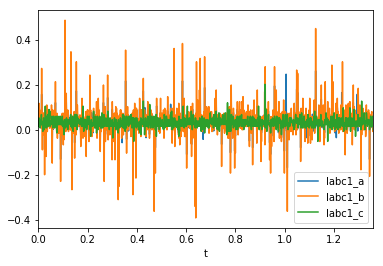

In [229]:
data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

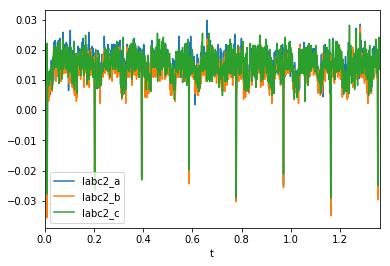

In [230]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

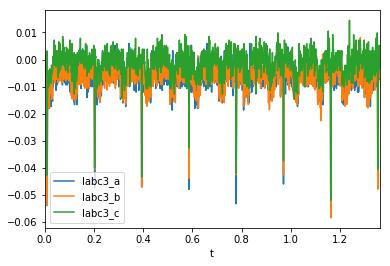

In [231]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Iabc1_a 1213208 1000 double
['log reg 0 LOG_Iabc1_a 1213208 1000 double', 'SUCCESS']
	> log reg 1 LOG_Iabc1_b 1213216 1000 double
['log reg 1 LOG_Iabc1_b 1213216 1000 double', 'SUCCESS']
	> log reg 2 LOG_Iabc1_c 1213224 1000 double
['log reg 2 LOG_Iabc1_c 1213224 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Iabc1_a           0            double              1000.0                0       
LOG_Iabc1_b           1            double              1000.0                0       
LOG_Iabc1_c           2            double              1000.0                0       

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log st

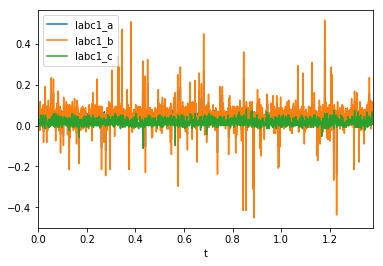

In [256]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [213]:
cmd.init_twin_ctrl()


	> twin init
['', 'SUCCESS', 'twin init']


	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_vabc1_a 1213280 1000 double
['log reg 0 LOG_vabc1_a 1213280 1000 double', 'SUCCESS']
	> log reg 1 LOG_vabc1_b 1213288 1000 double
['log reg 1 LOG_vabc1_b 1213288 1000 double', 'SUCCESS']
	> log reg 2 LOG_vabc1_c 1213296 1000 double
['log reg 2 LOG_vabc1_c 1213296 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_vabc1_a           0            double              1000.0                0       
LOG_vabc1_b           1            double              1000.0                0       
LOG_vabc1_c           2            double              1000.0                0       

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log st

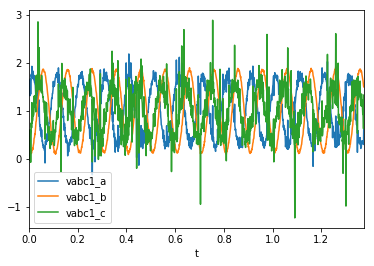

In [265]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Itq_d_ref 1213352 1000 double
['log reg 0 LOG_Itq_d_ref 1213352 1000 double', 'SUCCESS']
	> log reg 1 LOG_Itq_q_ref 1213360 1000 double
['log reg 1 LOG_Itq_q_ref 1213360 1000 double', 'SUCCESS']
	> log reg 2 LOG_Itq_d 1213400 1000 double
['log reg 2 LOG_Itq_d 1213400 1000 double', 'SUCCESS']
	> log reg 3 LOG_Itq_q 1213408 1000 double
['log reg 3 LOG_Itq_q 1213408 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Itq_d_ref         0            double              1000.0                0       
LOG_Itq_q_ref         1            double              1000.0                0       
LOG_Itq_d             2            double              1000.0                0       
LOG

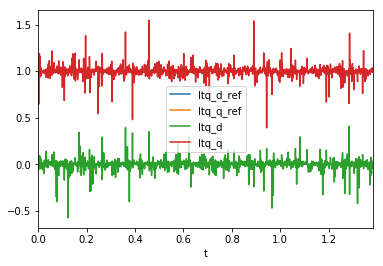

In [270]:
logger.unregister_all()
logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d|Itq_q$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Is1_d_ref 1213368 1000 double
['log reg 0 LOG_Is1_d_ref 1213368 1000 double', 'SUCCESS']
	> log reg 1 LOG_Is1_q_ref 1213376 1000 double
['log reg 1 LOG_Is1_q_ref 1213376 1000 double', 'SUCCESS']
	> log reg 2 LOG_Is1_d 1213416 1000 double
['log reg 2 LOG_Is1_d 1213416 1000 double', 'SUCCESS']
	> log reg 3 LOG_Is1_q 1213424 1000 double
['log reg 3 LOG_Is1_q 1213424 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Is1_d_ref         0            double              1000.0                0       
LOG_Is1_q_ref         1            double              1000.0                0       
LOG_Is1_d             2            double              1000.0                0       
LOG

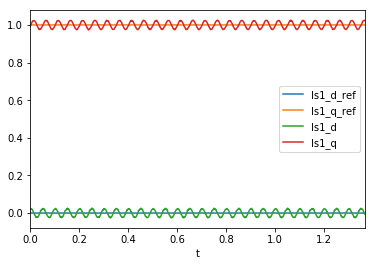

In [267]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_Is2_d_ref 1213384 1000 double
['log reg 0 LOG_Is2_d_ref 1213384 1000 double', 'SUCCESS']
	> log reg 1 LOG_Is2_q_ref 1213392 1000 double
['log reg 1 LOG_Is2_q_ref 1213392 1000 double', 'SUCCESS']
	> log reg 2 LOG_Is2_d 1213432 1000 double
['log reg 2 LOG_Is2_d 1213432 1000 double', 'SUCCESS']
	> log reg 3 LOG_Is2_q 1213440 1000 double
['log reg 3 LOG_Is2_q 1213440 1000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_Is2_d_ref         0            double              1000.0                0       
LOG_Is2_q_ref         1            double              1000.0                0       
LOG_Is2_d             2            double              1000.0                0       
LOG

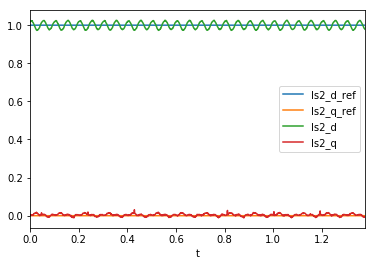

In [268]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()